# **Week 7 Solutions**

### Please have a good hard go at your challenge questions before looking through these solutions.

### Here is a bit of motivation cat for you to give those challenges your best shot.

## **You've got this!**

![motivation-cat](..\resources\images\MotivationCat.png)


# **Challenge Task**
Create a CNN to classify images of numbers from the MNIST dataset. It is important that you complete the following:

1. Pre-process the data
2. Create CNN model and justify your decision on filter shape, number of filters, number of layers etc.
3. Train the model
4. Evaluate performance and determine ways to improve model

#### **Extra Challenge**: 
Create a Fully Connected Neural Network and compare its performance with your CNN.

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.metrics import Precision, Recall
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

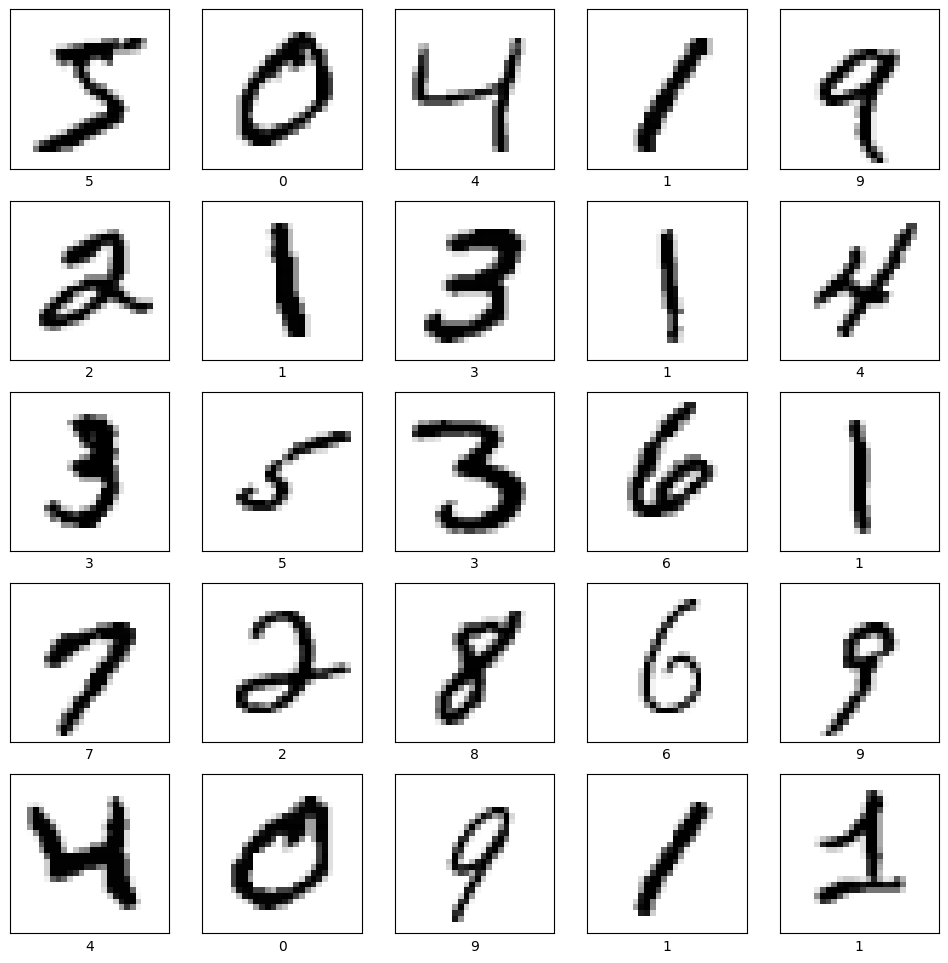

In [3]:
def show_images(train_images,
            	class_names,
            	train_labels,
            	nb_samples = 25, nb_row = 5):
    
	plt.figure(figsize=(12, 12))
	for i in range(nb_samples):
		plt.subplot(nb_row, nb_row, i + 1)
		plt.xticks([])
		plt.yticks([])
		plt.grid(False)
		plt.imshow(train_images[i], cmap=plt.cm.binary)
		plt.xlabel(class_names[train_labels[i]])
	plt.show()

class_names = ['0','1', '2', '3', '4', '5',
           	'6', '7', '8', '9']

show_images(x_train, class_names, y_train)

We need to normalise the pixel values to the same range (0 to 1) to remove scale invariance and increase convergence during training.

In [4]:
max_pixel_value = 255

x_train = x_train / max_pixel_value
x_test = x_test / max_pixel_value

y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))

# Model Architecture

We have added in a few things to the CNN model that we did not cover within the training content. These extra features can be very useful, especially to deal with overfitting. However, if you can get good performance it is better to use a simple model, than to use a complex model with lots of overfitting prevention. So it is usually a good idea to start simple, and if performance is low, start slowing building the model up and comparing the performance each time. The loss, precision, recall and accuracy curves per epoch are really good at showing how the model has performed. The shapes of these curves give you insights into if the model is overfitting, underfitting or doing something completely strange.

With this in mind, here are some resources you can read that explain the extra techniques we have added:
1. Padding - Add a border of zeros around the input to convolution so that the output keeps or increases in size. [CNN Introduction to Padding](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)
2. Regularisation - Adds a penalty to the loss function to stop weights have too large an impact on the output [Regularization in deep learning(CNN)-All you need to know!](https://medium.com/@raghu.murugankutty5/regularization-techniques-to-minimize-overfitting-in-deep-learning-image-classification-using-cnn-51d6406cfe0f)
3. Dropout Layers - Randomly drop some nodes from the network for one epoch so that the model is forced to learn new information without overfitting [Dropout in Neural Networks](https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9)

In [5]:
INPUT_SHAPE = (28, 28, 1)
NUM_CLASSES = len(class_names)
# Define the model
model = Sequential()

# Add convolutional layers with L2 regularization
model.add(Input(shape=INPUT_SHAPE))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Add a flatten layer
model.add(Flatten())

# Add fully connected layers with dropout
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,458 (1.38 MB)

 Trainable params: 360,458 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
class TestSetEvaluationCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_metrics = pd.DataFrame(columns=['epoch', 'test_loss', 'test_accuracy', 'test_precision', 'test_recall'])

    def on_epoch_end(self, epoch, logs=None):
        x_test, y_test = self.test_data
        test_loss, test_accuracy, test_precision, test_recall = self.model.evaluate(x_test, y_test, verbose=0)
        
        # Save the metrics into the DataFrame
        new_row = pd.DataFrame({
            'epoch': [epoch + 1],
            'test_loss': [test_loss],
            'test_accuracy': [test_accuracy],
            'test_precision': [test_precision],
            'test_recall': [test_recall]
        })
        self.test_metrics = pd.concat([self.test_metrics, new_row], ignore_index=True)

Instead of using the test data for both validation and testing, we will use the "validation_split=0.3" to have a completely separete dataset for validation and a separate one for testing. This means that our testing set is never used in the loss calculation or back propogation of the model. This is usually the most common practice, to have one dataset for training (forward propogation), one dataset for validation (backwards propogation) and one dataset for testing (checking performance).

In [9]:
BATCH_SIZE = 32
EPOCHS = 10

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

test_data = (x_test, y_test)
# this custom callback is executed every time an epoch has executed.
test_callback = TestSetEvaluationCallback(test_data)

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

training_history = model.fit(x_train, y_train,
                             epochs=EPOCHS, batch_size=BATCH_SIZE,
                             validation_split=0.3, shuffle=True,
                             callbacks=[test_callback])

# Access test metrics
test_metrics_df = test_callback.test_metrics

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9110 - loss: 0.7967 - precision: 0.9511 - recall: 0.8817 - val_accuracy: 0.9526 - val_loss: 0.4567 - val_precision: 0.9694 - val_recall: 0.9339
Epoch 2/10
   5/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9416 - loss: 0.4617 - precision: 0.9635 - recall: 0.9147 

C:\Users\gb191\AppData\Local\Temp\ipykernel_18620\3649010165.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.test_metrics = pd.concat([self.test_metrics, new_row], ignore_index=True)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9529 - loss: 0.4260 - precision: 0.9646 - recall: 0.9409 - val_accuracy: 0.9638 - val_loss: 0.3671 - val_precision: 0.9726 - val_recall: 0.9556
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9575 - loss: 0.3808 - precision: 0.9670 - recall: 0.9464 - val_accuracy: 0.9653 - val_loss: 0.3353 - val_precision: 0.9737 - val_recall: 0.9576
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9586 - loss: 0.3557 - precision: 0.9685 - recall: 0.9490 - val_accuracy: 0.9705 - val_loss: 0.3091 - val_precision: 0.9775 - val_recall: 0.9635
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9610 - loss: 0.3332 - precision: 0.9696 - recall: 0.9527 - val_accuracy: 0.9680 - val_loss: 0.3045 - val_precision: 0.9753 - val_recall: 0.9597
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9619 - loss: 0.3202 - precision: 0.9697 - recall: 0.9541 - val_accuracy: 0.9666 - val

We can plot the loss, accuracy, precision and recall. It is good to plot loss to see if the model is improving in performance, or if it is starting to overfit and cause the loss to get worse.

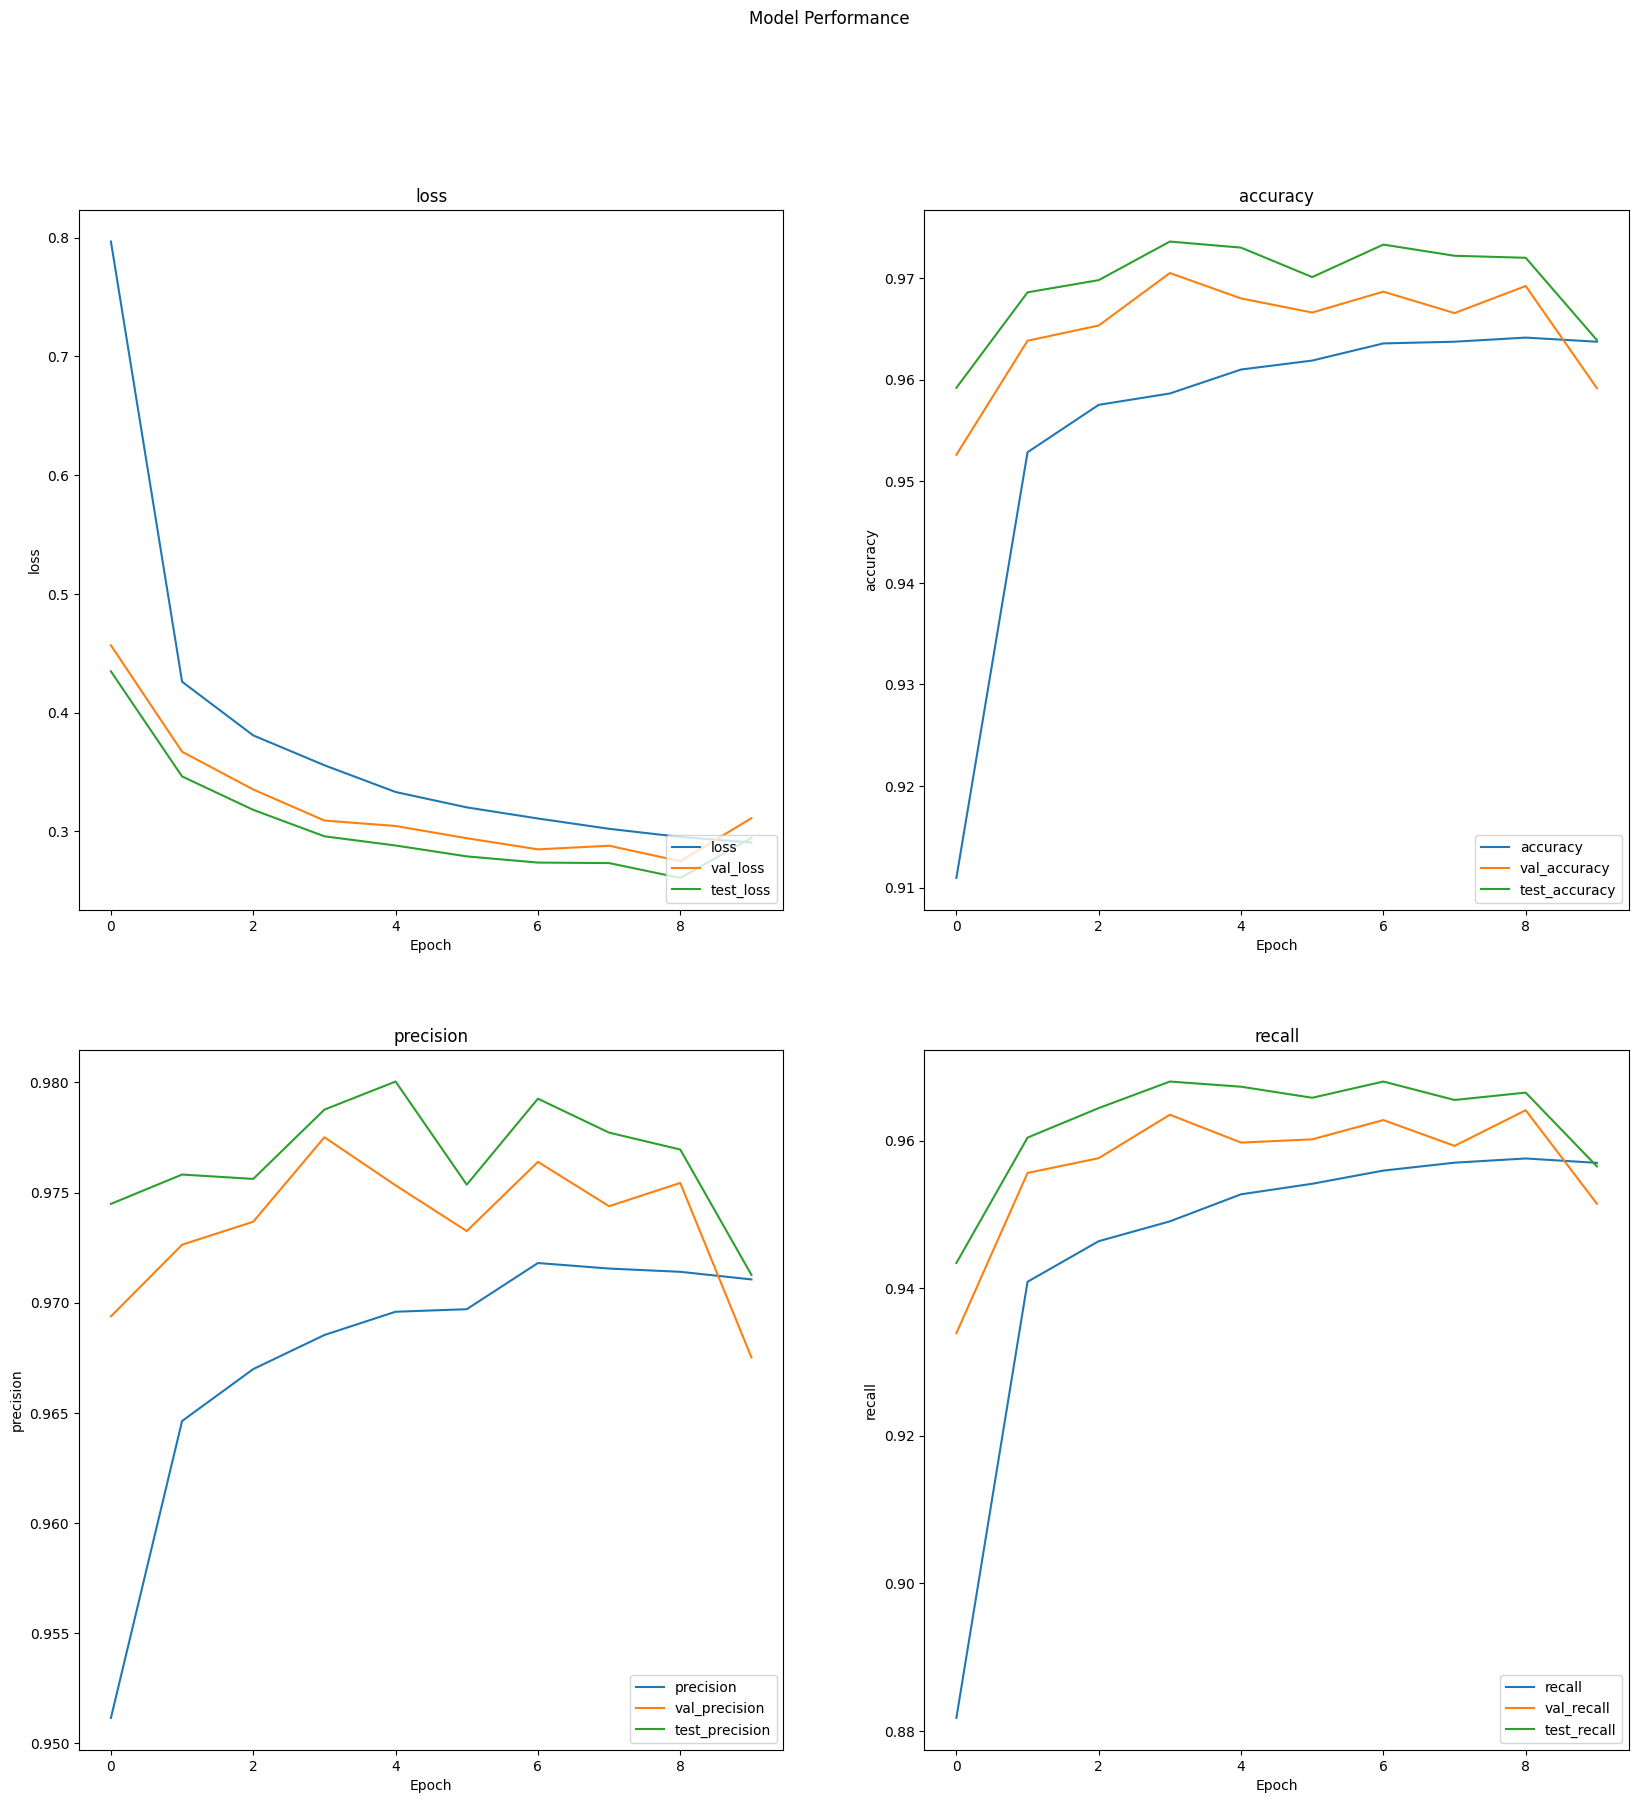

In [10]:
metric_list = ['loss','accuracy','precision','recall']

plt.figure(figsize=(20,20))
for i, metric in enumerate(metric_list):

	train_perf = training_history.history[metric]
	val_perf = training_history.history['val_'+metric]
	test_per = test_metrics_df["test_" + metric].tolist()

	plt.subplot(2,2,i+1)
	plt.plot(train_perf, label=metric)
	plt.plot(val_perf, label = 'val_'+metric)
	plt.plot(test_per, label='test_'+metric)
    	 
	plt.xlabel('Epoch')
	plt.ylabel(metric)
	plt.title(metric)
	plt.legend(loc='lower right')

plt.suptitle("Model Performance")
plt.show()


## Final Evaluation

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9639 - loss: 0.2945 - precision: 0.9713 - recall: 0.9565
Test Loss: 0.294473797082901
Test Accuracy: 0.9639000296592712
Test Precision: 0.9712632298469543
Test Recall: 0.9564999938011169


# Comparison to Fully Connected Network
Let us try to solve the same problem, but this time with a Fully Connected Neural Network. Because the task is so simple (classifying numbers based on the image of the number), the Fully Connected Neural Network may actually even perform better.

In [12]:
# Flatten the images to 1D vectors
x_train_flat = x_train.reshape(len(x_train),28* 28)
x_test_flat = x_test.reshape(len(x_test),28* 28)

# Define the model
model = Sequential()
model.add(Input(shape=(28 * 28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)
              
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,090 (3.17 MB)

 Trainable params: 830,090 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Train the model
model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9313 - loss: 0.2219 - precision: 0.9536 - recall: 0.9236 - val_accuracy: 0.9560 - val_loss: 0.1562 - val_precision: 0.9650 - val_recall: 0.9467
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9684 - loss: 0.1054 - precision: 0.9738 - recall: 0.9635 - val_accuracy: 0.9624 - val_loss: 0.1277 - val_precision: 0.9707 - val_recall: 0.9556
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9787 - loss: 0.0733 - precision: 0.9818 - recall: 0.9754 - val_accuracy: 0.9728 - val_loss: 0.0999 - val_precision: 0.9774 - val_recall: 0.9687
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9819 - loss: 0.0617 - precision: 0.9843 - recall: 0.9796 - val_accuracy: 0.9756 - val_loss: 0.0937 - val_precision: 0.9780 - val_recall: 0.9733
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9847 - loss: 0.0514 - precision: 0.9869 - recall: 0.9825 - val_accuracy: 0.9

Our CNN has 360,458 parameters whilst our Fully Connected NN has 830,090 parameters. How does the performance compare with so many more params?

In [16]:

# Evaluate the model
fullyconnected_test_loss, fullyconnected_test_accuracy, fullyconnected_test_precision, fullyconnected_test_recall =  model.evaluate(x_test_flat, y_test)

print("\nConvolutional Neural Network Results")
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}\n')

print("Fully Connected Neural Network Results")
print(f'Test Loss: {fullyconnected_test_loss}')
print(f'Test Accuracy: {fullyconnected_test_accuracy}')
print(f'Test Precision: {fullyconnected_test_precision}')
print(f'Test Recall: {fullyconnected_test_recall}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9818 - loss: 0.0798 - precision: 0.9843 - recall: 0.9802

Convolutional Neural Network Results
Test Loss: 0.294473797082901
Test Accuracy: 0.9639000296592712
Test Precision: 0.9712632298469543
Test Recall: 0.9564999938011169

Fully Connected Neural Network Results
Test Loss: 0.07975788414478302
Test Accuracy: 0.9818000197410583
Test Precision: 0.9843342304229736
Test Recall: 0.9801999926567078


# **Optional Challenge Task 2**

Create a neural network of your choice to predict the California Housing Prices. Follow the process outlined in the challenge task above. We did use a MLPRegressor to complete this task in the notebook content above. Can you find a way to improve performance without using the MLPRegressor?

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping


# Load the California housing dataset
california = fetch_california_housing()
x = california.data
y = california.target

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# Normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)


C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.9544 - mae: 0.6731 - mse: 0.9544 - val_loss: 0.4368 - val_mae: 0.4592 - val_mse: 0.4368
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4652 - mae: 0.4884 - mse: 0.4652 - val_loss: 0.4004 - val_mae: 0.4431 - val_mse: 0.4004
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4327 - mae: 0.4700 - mse: 0.4327 - val_loss: 0.3832 - val_mae: 0.4331 - val_mse: 0.3832
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4271 - mae: 0.4635 - mse: 0.4271 - val_loss: 0.3660 - val_mae: 0.4262 - val_mse: 0.3660
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3878 - mae: 0.4436 - mse: 0.3878 - val_loss: 0.3391 - val_mae: 0.4041 - val_mse: 0.3391
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3789 - mae: 0.4361 - mse: 0.3789 - val_loss: 0.3350 - val_mae: 0.4033 - val_mse: 0.3350
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3774 - mae: 0.4317 - mse: 0.377

In [44]:
# Predict and evaluate
y_pred_sequential = model.predict(x_test_scaled)

mse_sequential = mean_squared_error(y_test, y_pred_sequential)
r2_sequential = r2_score(y_test, y_pred_sequential)

print(f"Test MSE: {mse_sequential:.4f}")
print(f"Test R²: {r2_sequential:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 0.2737
Test R²: 0.7912


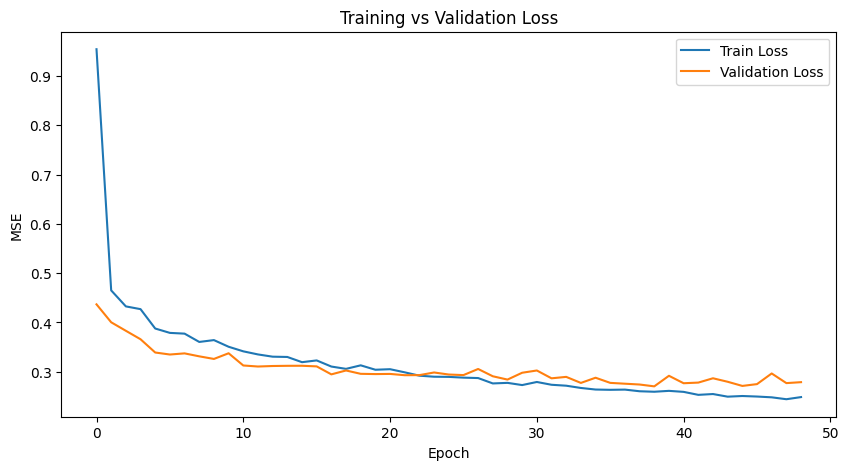

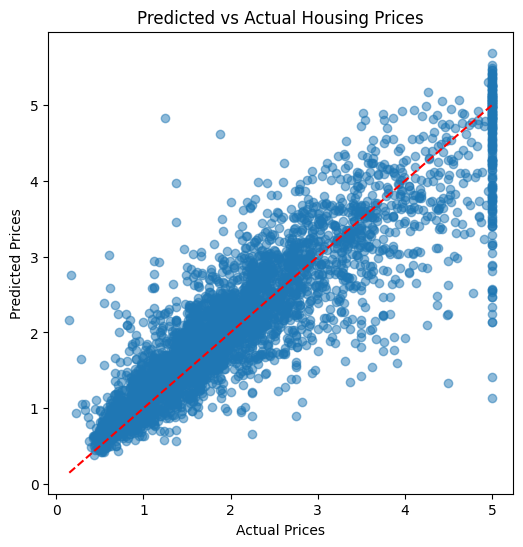

In [41]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Scatter plot: predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_sequential, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Housing Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Compare to the MLPRegressor

In [46]:
# Create a MLPRegressor model
from sklearn.neural_network import MLPRegressor

# This example uses a neural network with two hidden layers, each with 50 neurons
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', random_state=42, max_iter=1000)

# Train the model
mlp_regressor.fit(x_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp_regressor.predict(x_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)


From the results below we can see the Sequential Neural Network performs slightly better than the MLPRegressor model. However, was it worth the extra computation time?

In [47]:
print("Sequential Neural Network")
print(f"Mean Squared Error: {mse_sequential:.4f}")
print(f"R² Score: {r2_sequential:.4f}")

print("\nMLP Regressor")
print(f"Mean Squared Error: {mse_mlp:.4f}")
print(f"R² Score: {r2_mlp:.4f}")

Sequential Neural Network
Mean Squared Error: 0.2737
R² Score: 0.7912

MLP Regressor
Mean Squared Error: 0.2773
R² Score: 0.7884


## Visual Comparison

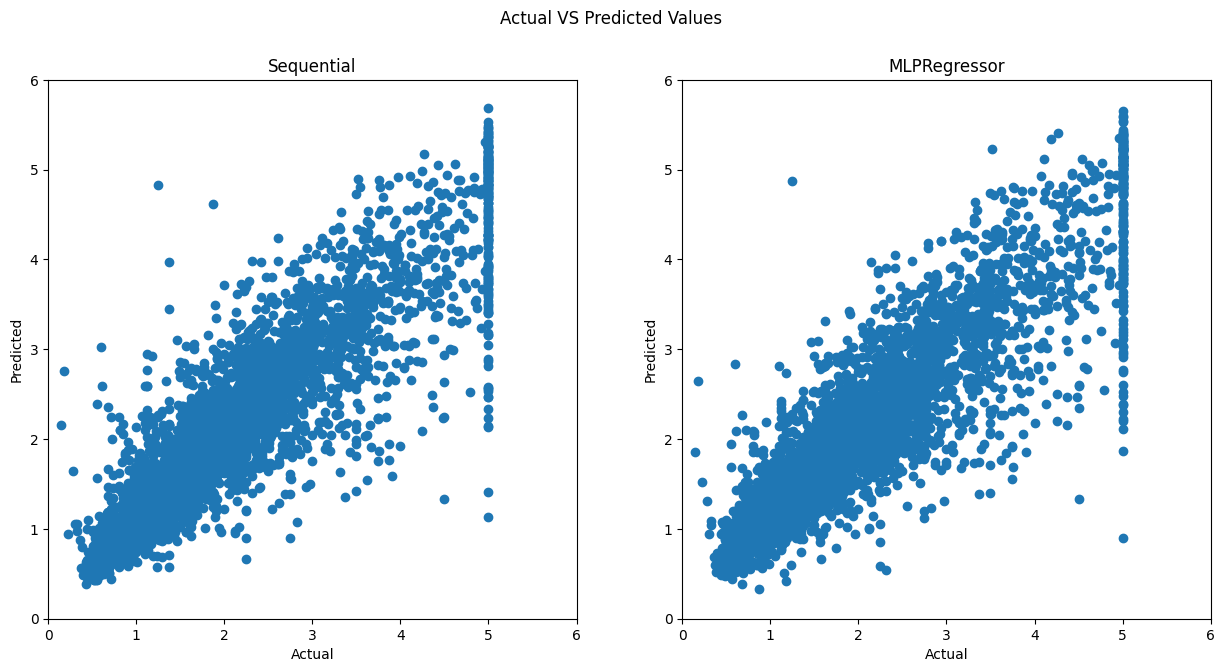

In [77]:
plt.figure(figsize=(15,7))

plt.suptitle("Actual VS Predicted Values")

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_sequential)
plt.xlim([0,6])
plt.ylim([0,6])
plt.title("Sequential")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_mlp)
plt.xlim([0,6])
plt.ylim([0,6])
plt.title("MLPRegressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

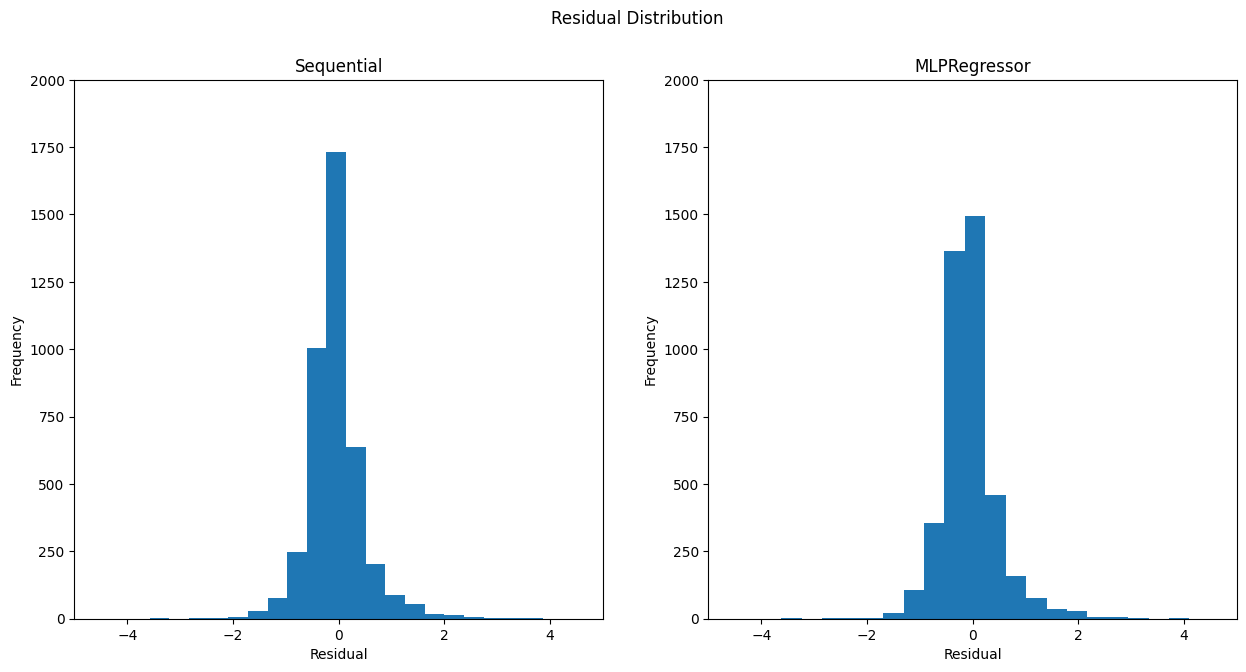

In [67]:
plt.figure(figsize=(15,7))

plt.suptitle("Residual Distribution")

plt.subplot(1,2,1)
plt.hist(y_test-y_pred_sequential.flatten(), bins=20)
plt.xlim([-5,5])
plt.ylim([0,2000])
plt.title("Sequential")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(y_test-y_pred_mlp.flatten(), bins=20)
plt.xlim([-5,5])
plt.ylim([0,2000])
plt.title("MLPRegressor")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.show()

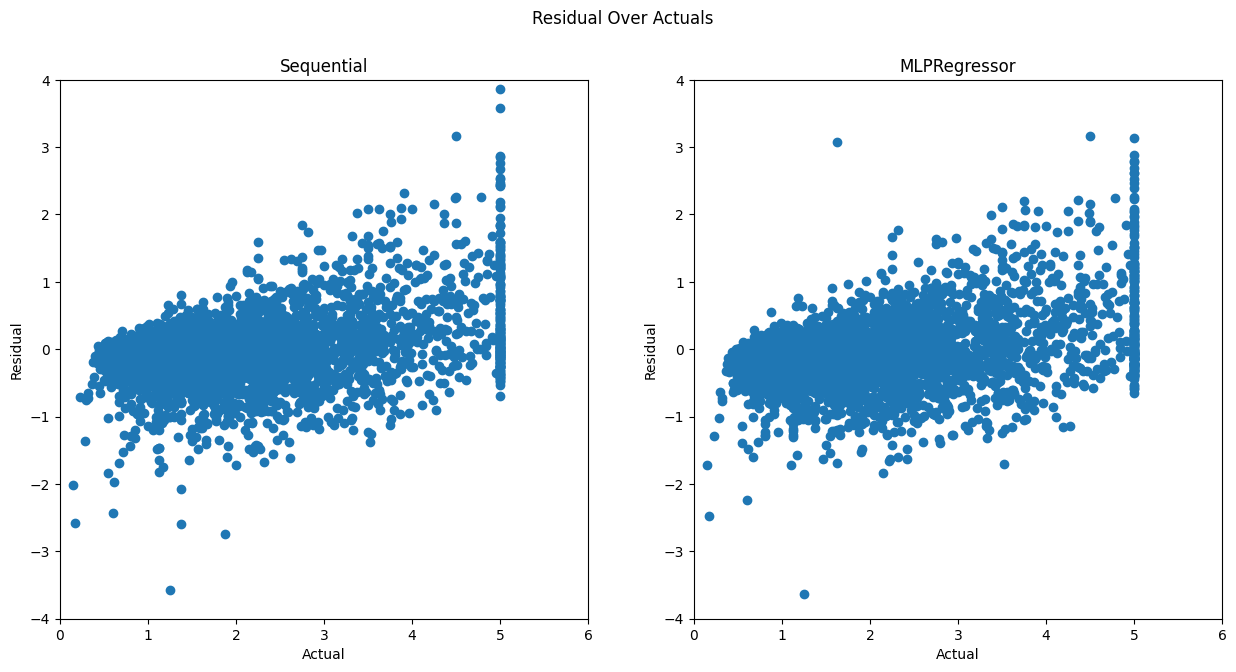

In [69]:
plt.figure(figsize=(15,7))

plt.suptitle("Residual Over Actuals")

plt.subplot(1,2,1)
plt.scatter(y_test, y_test-y_pred_sequential.flatten())
plt.xlim([0, 6])
plt.ylim([-4, 4])
plt.title("Sequential")
plt.xlabel("Actual")
plt.ylabel("Residual")

plt.subplot(1,2,2)
plt.scatter(y_test, y_test-y_pred_mlp.flatten())
plt.xlim([0, 6])
plt.ylim([-4, 4])
plt.title("MLPRegressor")
plt.xlabel("Actual")
plt.ylabel("Residual")

plt.show()

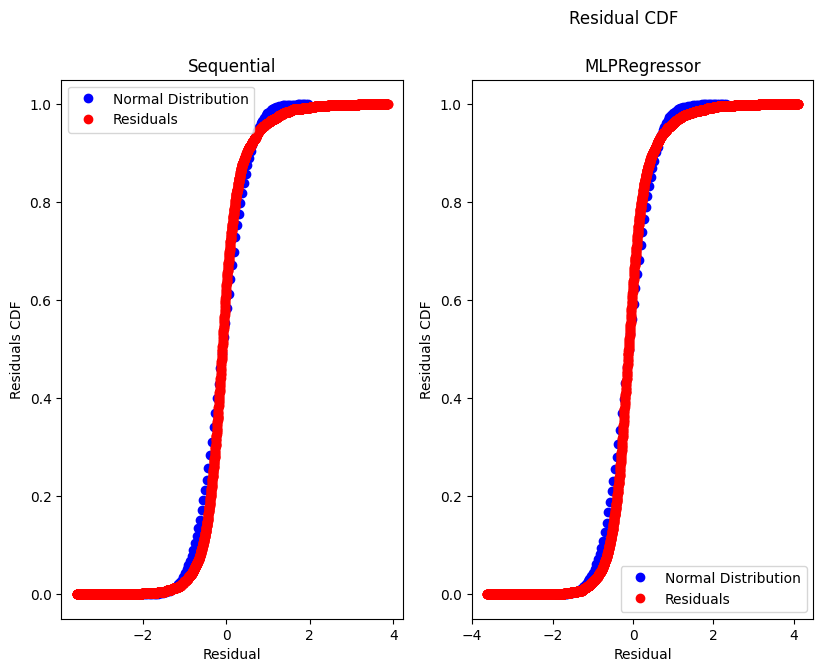

In [73]:
import scipy

# Make sure to use the residuals of the test set, not the training set
def cdf_results(y_test,y_pred):
    resid = y_test-y_pred.flatten()
    mean = np.mean(resid)
    std_dev = np.std(resid)
    norm_data = np.random.normal(mean,std_dev,10000)

    n_test_samples = len(resid)
    counts, start, dx, _ = scipy.stats.cumfreq(resid, numbins=n_test_samples)
    x = np.arange(counts.size) * dx + start

    counts_, start_, dx_, _ = scipy.stats.cumfreq(norm_data, numbins=100)
    x_norm = np.arange(counts_.size) * dx_ + start_

    return x_norm,x,counts_,counts,n_test_samples

x_norm_seq,x_seq,counts__seq,counts_seq,n_test_samples_seq = cdf_results(y_test,y_pred_sequential)
x_norm_mlp,x_mlp,counts__mlp,counts_mlp,n_test_samples_mlp = cdf_results(y_test,y_pred_mlp)

plt.figure(figsize=(15,7))

plt.suptitle("Residual CDF")

plt.subplot(1,3,1)
plt.plot(x_norm_seq, counts__seq/10000, 'bo', label ="Normal Distribution")
plt.plot(x_seq, counts_seq/n_test_samples_seq, 'ro', label="Residuals")
plt.xlabel('Residual')
plt.ylabel('Residuals CDF')
plt.title('Sequential')
plt.legend()

plt.subplot(1,3,2)
plt.plot(x_norm_mlp, counts__mlp/10000, 'bo', label ="Normal Distribution")
plt.plot(x_mlp, counts_mlp/n_test_samples_mlp, 'ro', label="Residuals")
plt.xlabel('Residual')
plt.ylabel('Residuals CDF')
plt.title('MLPRegressor')
plt.legend()

plt.show()